# Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Text(0.3, 0.3, '한글')

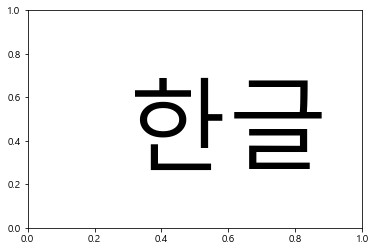

In [2]:
plt.text(0.3, 0.3, '한글', size=100)

# Import/Preprocess Datasets

In [3]:
df_new = pd.read_csv('./data/공공자전거 대여이력_2021.05.csv', engine = 'python')
df_new.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-51372,2021-04-30 23:13:46,605,신설동역8번출구,0,2021-05-01 00:00:03,4710,자교교회 앞,0,46,6234.92
1,SPB-51159,2021-04-30 23:52:51,2277,길마중4교 하부,0,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,0,7,1660.90
2,SPB-32374,2021-04-30 23:52:31,703,오목교역 7번출구 앞,0,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,0,7,1377.78
3,SPB-39733,2021-04-30 23:50:46,1721,창동역 2번출구,0,2021-05-01 00:00:05,1690,도봉운전면허시험장,0,9,1404.03
4,SPB-81816,2021-04-30 23:51:57,1351,안암2교 옆,99,2021-05-01 00:00:05,378,청계7가 사거리,99,8,1770.00


In [4]:
df_new.replace({'천호역4번출구(?測鍮蓉?점)' : '천호역4번출구(현대백화점)', 
                '천호역4번출구(현대백??점)' : '천호역4번출구(현대백화점)', 
                '뚝섬유원지??1번출구 앞' : '뚝섬유원지역 1번출구 앞', 
                '?떠爭し玲?2번 출구' : '마곡나루역 2번 출구', 
                '신도림역 1번 ?瘦?앞' : '신도림역 1번 출구 앞',
                '장한평역 1?萍瘦?(국민은행앞)' : '장한평역 1번출구 (국민은행앞)', 
                '흑석??1번출구' : '흑석역 1번출구', 
                '안암로터리 버?봐ㅇ昰?앞' : '안암로터리 버스정류장 앞', 
                '롯데월드타워(잠실역2번출구 ??' : '롯데월드타워(잠실역2번출구 쪽)', 
                '목동역5번출구 교통정?맑씽?앞' : '목동역5번출구 교통정보센터 앞', 
                '?㈏풍し玲?1번출구 앞' : '여의나루역 1번출구 앞', 
                '여의나?玲?1번출구 앞' : '여의나루역 1번출구 앞'}, inplace = True)

## Delete unnecessary columns and split the time variable

In [5]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2021-04-30 23:13:46,605,신설동역8번출구,2021-05-01 00:00:03,4710,자교교회 앞,46
1,2021-04-30 23:52:51,2277,길마중4교 하부,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,7
2,2021-04-30 23:52:31,703,오목교역 7번출구 앞,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,7
3,2021-04-30 23:50:46,1721,창동역 2번출구,2021-05-01 00:00:05,1690,도봉운전면허시험장,9
4,2021-04-30 23:51:57,1351,안암2교 옆,2021-05-01 00:00:05,378,청계7가 사거리,8


In [6]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [7]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-04-30 12:18:15,4206,광흥창역5번출구,2021-05-01 08:45:32,4206,광흥창역5번출구,1227,4,30,4,12,18,5,1,5,8,45
1,2021-04-30 17:19:11,1751,창원초등학교 교차로,2021-05-01 01:37:26,1751,창원초등학교 교차로,498,4,30,4,17,19,5,1,5,1,37
2,2021-04-30 18:32:00,164,북가좌1동 주민센터,2021-05-01 08:30:34,914,새절역 2번출구,838,4,30,4,18,32,5,1,5,8,30
3,2021-04-30 20:14:27,1149,신방화역환승주차장,2021-05-01 00:18:00,1158,가양역 8번출구,243,4,30,4,20,14,5,1,5,0,18
4,2021-04-30 20:32:18,1611,과기대 입구(우),2021-05-01 00:04:31,1442,(구)신한은행 중랑교지점,212,4,30,4,20,32,5,1,5,0,4


## Rental Data
- Get Rent Count and define $\mu$
- $\mu$ = 10이면 15분동안 평균 10대의 자전거 대여

In [8]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-04-30 12:18:15,광흥창역5번출구,4206,4,30,4,12,18
1,2021-04-30 17:19:11,창원초등학교 교차로,1751,4,30,4,17,19
2,2021-04-30 18:32:00,북가좌1동 주민센터,164,4,30,4,18,32
3,2021-04-30 20:14:27,신방화역환승주차장,1149,4,30,4,20,14
4,2021-04-30 20:32:18,과기대 입구(우),1611,4,30,4,20,32


In [9]:
#df_rental2 = pd.DataFrame(df_rental[['대여대여소명','대여대여소번호','대여월','대여일','대여시간']].value_counts()).reset_index().rename(columns = {0 : 'rent_count'})
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여월','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 31
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여월,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,5,0,1.064516,0.266129
1,(구)신한은행 중랑교지점,1442,5,1,1.096774,0.274194
2,(구)신한은행 중랑교지점,1442,5,2,1.000000,0.250000
3,(구)신한은행 중랑교지점,1442,5,3,0.451613,0.112903
4,(구)신한은행 중랑교지점,1442,5,4,0.419355,0.104839
...,...,...,...,...,...,...
56062,힐스테이트에코,2720,5,19,7.806452,1.951613
56063,힐스테이트에코,2720,5,20,7.580645,1.895161
56064,힐스테이트에코,2720,5,21,6.774194,1.693548
56065,힐스테이트에코,2720,5,22,2.903226,0.725806


In [10]:
df_rental2 = df_rental2.sort_values('mu_15', ascending = False).reset_index(drop = True)
df_rental2

,대여대여소명,대여대여소번호,대여월,대여시간,rent_count,mu_15
0,여의나루역 1번출구 앞,207,5,17,56.032258,14.008065
1,여의나루역 1번출구 앞,207,5,18,54.516129,13.629032
2,뚝섬유원지역 1번출구 앞,502,5,18,53.580645,13.395161
3,뚝섬유원지역 1번출구 앞,502,5,19,49.290323,12.322581
4,여의나루역 1번출구 앞,207,5,16,47.225806,11.806452
...,...,...,...,...,...,...
56062,SBS방송국,723,4,23,0.032258,0.008065
56063,탑성마을 버스정거장 옆,4314,5,15,0.032258,0.008065
56064,탑성마을 버스정거장 옆,4314,5,14,0.032258,0.008065
56065,송파구청,2608,5,4,0.032258,0.008065


## Return Data
- $\lambda$ : 평균도착률(15분당 자전거 반납수의 평균) 
- $\lambda$ = 10이면 15분동안 평균 10대의 자전거를 반납
- c: 최대거치용량
- return_count = r(t) : 관측된 자전거 반납수

In [11]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)

df_return.head()

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-01 08:45:32,광흥창역5번출구,4206,5,1,5,8,45
1,2021-05-01 01:37:26,창원초등학교 교차로,1751,5,1,5,1,37
2,2021-05-01 08:30:34,새절역 2번출구,914,5,1,5,8,30
3,2021-05-01 00:18:00,가양역 8번출구,1158,5,1,5,0,18
4,2021-05-01 00:04:31,(구)신한은행 중랑교지점,1442,5,1,5,0,4


### Define Variables
- C as upper bound (Q3+IQR*1.5)
- Return count and Lambda

In [12]:
#df_c = pd.DataFrame(df_return[['반납대여소명','반납대여소번호','반납월','반납일', '반납시간']].value_counts()).rename(columns = {0 : 'return_count'}).reset_index()
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납월','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
#df_c.reset_index(drop=True, inplace = True)
df_c['return_count'] = df_c['return_count'] / 31
df_c['lambda15'] = df_c['return_count']/ 4
df_c = df_c.sort_values('lambda15', ascending = False).reset_index(drop = True)
df_c.columns = ['대여소명','대여소번호','월','시간','return_count','lambda15']
df_c

,대여소명,대여소번호,월,시간,return_count,lambda15
0,뚝섬유원지역 1번출구 앞,502,5,18,63.096774,15.774194
1,뚝섬유원지역 1번출구 앞,502,5,19,61.161290,15.290323
2,뚝섬유원지역 1번출구 앞,502,5,17,58.193548,14.548387
3,여의나루역 1번출구 앞,207,5,18,56.903226,14.225806
4,뚝섬유원지역 1번출구 앞,502,5,16,53.129032,13.282258
...,...,...,...,...,...,...
54983,이랜드글로벌R&D센터,3801,5,19,0.032258,0.008065
54984,핀란드 타워앞,3133,5,9,0.032258,0.008065
54985,핀란드 타워앞,3133,5,3,0.032258,0.008065
54986,핀란드 타워앞,3133,5,2,0.032258,0.008065


In [13]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound.head()

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,7.0
1,(시립)고덕평생학습관,1070,2.0
2,(재)FITI시험연구원,2724,7.0
3,3호선 매봉역 3번출구앞,2335,5.0
4,419민주묘지 입구사거리,1568,2.0


### Merge Rental/Return DataFrame as one Dataset
- We can see that there are lots of NA values, cuased by non-existance of return/rent data at such TPO

In [14]:
df_rental2.columns = ['대여소명','대여소번호','월','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','월','시간'], how='outer')
df.tail()

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15
57260,올림픽공원 서1문 앞,4856,5,5,NaN,NaN,0.032258,0.008065
57261,송파도서관,1271,5,3,NaN,NaN,0.032258,0.008065
57262,방학사거리 (봄마당 앞),1733,4,23,NaN,NaN,0.032258,0.008065
57263,SBS방송국,723,4,23,NaN,NaN,0.032258,0.008065
57264,광진청소년수련관,577,4,23,NaN,NaN,0.032258,0.008065


### Create the base Dataframe
- So that there isn't any missed data in all station/days/time
- stops : unique station info (2281 rows)
- Dayhour : Time/days dataframe using repeat/tile function (24 * 31 rows as the sample data is of Jan)
- Dayhour_frame : combination of two dataframe(stops2, Dayhour) --> Total 2281* 31* 24 rows
- Combine the frame with the total datasets and fill na with 0

In [15]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'월':np.repeat(5, 24*len(stops)),'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [16]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','월','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head(5)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,5,18,63.096774,15.774194,53.580645,13.395161,89.0
1,뚝섬유원지역 1번출구 앞,502,5,19,61.161290,15.290323,49.290323,12.322581,89.0
2,뚝섬유원지역 1번출구 앞,502,5,17,58.193548,14.548387,46.032258,11.508065,89.0
3,뚝섬유원지역 1번출구 앞,502,5,16,53.129032,13.282258,45.161290,11.290323,89.0
4,뚝섬유원지역 1번출구 앞,502,5,20,49.387097,12.346774,38.419355,9.604839,89.0


In [17]:
df.tail()

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
62213,올림픽로 836(?틘?수로),1031,5,19,0.0,0.0,0.0,0.0,0.0
62214,올림픽로 836(?틘?수로),1031,5,20,0.0,0.0,0.0,0.0,0.0
62215,올림픽로 836(?틘?수로),1031,5,21,0.0,0.0,0.0,0.0,0.0
62216,올림픽로 836(?틘?수로),1031,5,22,0.0,0.0,0.0,0.0,0.0
62217,올림픽로 836(?틘?수로),1031,5,23,0.0,0.0,0.0,0.0,0.0


In [18]:
#df[df['대여소번호'] == 207]

# Create Algorithm

## $\mu$, $\lambda$, and the basic probability

In [19]:
def mui(data,t) : 
  return(float(data['mu_15'][(data['시간']==t)]))


def lambdai(data, t) : 
  return(float(data['lambda15'][(data['시간']==t)]))

In [20]:
data = df[(df['대여소번호']==207)&(df['월']==5)].reset_index()
data

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,26,여의나루역 1번출구 앞,207,5,18,56.903226,14.225806,54.516129,13.629032,84.0
1,27,여의나루역 1번출구 앞,207,5,17,52.129032,13.032258,56.032258,14.008065,84.0
2,28,여의나루역 1번출구 앞,207,5,19,49.548387,12.387097,42.774194,10.693548,84.0
3,29,여의나루역 1번출구 앞,207,5,16,47.774194,11.943548,47.225806,11.806452,84.0
4,30,여의나루역 1번출구 앞,207,5,20,45.064516,11.266129,38.483871,9.620968,84.0
5,31,여의나루역 1번출구 앞,207,5,21,39.129032,9.782258,34.709677,8.677419,84.0
6,32,여의나루역 1번출구 앞,207,5,15,35.322581,8.830645,35.774194,8.943548,84.0
7,33,여의나루역 1번출구 앞,207,5,22,32.677419,8.169355,28.419355,7.104839,84.0
8,34,여의나루역 1번출구 앞,207,5,14,25.129032,6.282258,26.612903,6.653226,84.0
9,35,여의나루역 1번출구 앞,207,5,23,20.225806,5.056452,19.096774,4.774194,84.0


In [21]:
mui(data, 15)

8.943548387096774

In [22]:
lambdai(data, 15)

8.830645161290322

## Define Stochastic Matrix for the conditioned Probability
- We need to get this conditioned probability defined as below
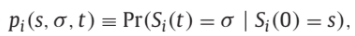
- Conditioned probability and Chapman-Kolmogorov Equations are defined as the picture below
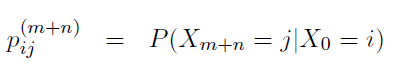
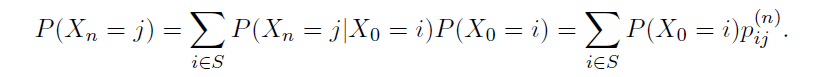

 Then, following the first and second definition & theorem, we can conclude that 
 
 $\ P( S(t) =  \sigma |  S(0) =s)$

= $\ P( S_{t+0} =  \sigma | S_{0} =s)$

= $\ P_{s,\sigma}^ {(t)} $

Thus, we need to get the stochastic matrix for the Markov chain.


### Calculate non conditional probability
To do this, we should first get the probability of each case(non-conditional), defined as below
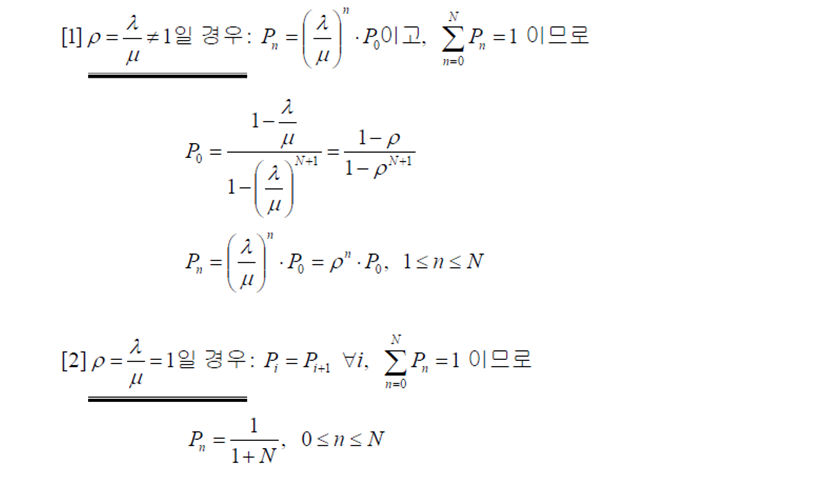


In [23]:
def ps(data,t, s) : 
  c = int(data['upperbound'][(data['시간']==1)])
  if mui(data,t) == 0 : 
    rho = 0
  else : 
    rho = lambdai(data,t)/mui(data,t) 
  if rho == 1 :
    p_s = 1/(1+c)
  else : 
    p0 = (1-rho)/(1-rho**(c+1))
    p_s = (rho**s)*p0
  return(p_s)

In [29]:
for s in range(85):
    print(ps(data, 3, s))

0.021008873436586757
0.020685659999100808
0.02036741907603772
0.0200540741671756
0.019745549949219055
0.01944177225769261
0.019142668069112724
0.01884816548343407
0.018558193706765855
0.018272683034354073
0.01799156483382555
0.01771477152868977
0.017442236582094546
0.017173894480831554
0.016909680719587993
0.016649531785440486
0.016393385142587556
0.01614117921731698
0.01589285338320441
0.01564834794653973
0.01540760413197758
0.015170564068408695
0.014937170775048561
0.014707368147740122
0.0144811009454672
0.014258314777075396
0.014038956088197314
0.013822972148378895
0.013610311038403836
0.013400921637813009
0.013194753612615887
0.012991757403191027
0.012791884212372704
0.012595085993720818
0.012401315439971266
0.012210525971664016
0.012022671725946111
0.011837707545546939
0.01165558896792314
0.011476272214570479
0.011299714180500164
0.011125872423877083
0.010954705155817437
0.010786171230343323
0.01062023013449189
0.01045684197857663
0.010295967486598528
0.010137567986804706
0.009981

### Get the elements for the stochastic matrix

- As the picture below, we'll create a squre matrix whose column number is c+1.
- Through create_mat() function, we can get the matrix on the right side of the picture. 
- Every element can be got from the ps() function defined above
- ps_cond() function is to get the square matrix whose elements mean conditioned probability 

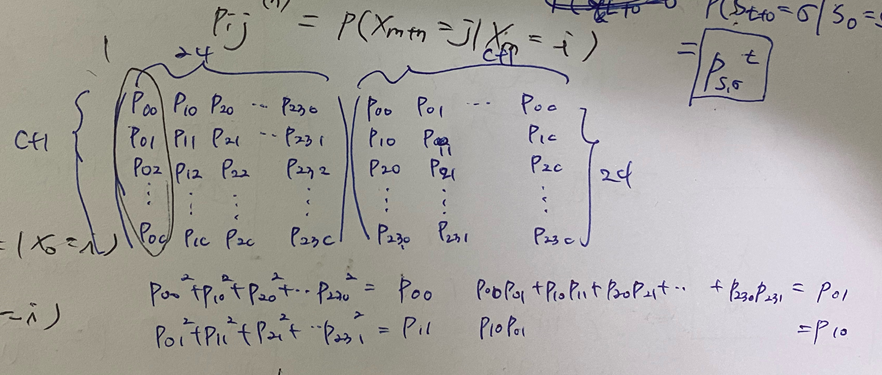

In [30]:
def create_mat(data) : 
  c = int(data['upperbound'][(data['시간']==1)])
  L=[]
  for t in range(24) : 
    for s in range(c+1) :
      L.append(round(ps(data,t, s),4))
  mat = np.matrix(np.reshape(L,(24,c+1)))
  return(mat)

def ps_cond(data,t, s, sigma) : 
  mat = create_mat(data)
  c = int(data['upperbound'][(data['시간']==1)])
  mat2 = mat.transpose() @ mat
  prob = mat2[s,sigma]
  return(prob ** t)

In [31]:
create_mat(data)

matrix([[0.0905, 0.0823, 0.0749, ..., 0.    , 0.    , 0.    ],
        [0.0358, 0.0346, 0.0334, ..., 0.0021, 0.002 , 0.002 ],
        [0.0885, 0.0807, 0.0736, ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.0889, 0.1002, 0.1129],
        [0.    , 0.    , 0.    , ..., 0.0986, 0.1133, 0.1303],
        [0.0005, 0.0005, 0.0005, ..., 0.0501, 0.0531, 0.0562]])

In [32]:
for s in range(85):
    print(ps_cond(data, 3, s, 0))

0.23162131370204478
0.06522012862471348
0.019339165211309052
0.006094547793111379
0.002062427367177951
0.0007567257329210786
0.0003022250508302202
0.00013200728218651153
6.279999517644179e-05
3.248838695513794e-05
1.790915409457931e-05
1.0721261059196986e-05
6.6860144990381175e-06
4.365135544079535e-06
2.957781063721066e-06
2.0712676522369117e-06


KeyboardInterrupt: 

In [28]:
for s in range(85):
    print(ps_cond(data, 0, s, 84))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

## Define Expected values of bike pickup/return demands
- Now we can calculate the expected values of bike pickup/return demands, expressed as e_satisfied
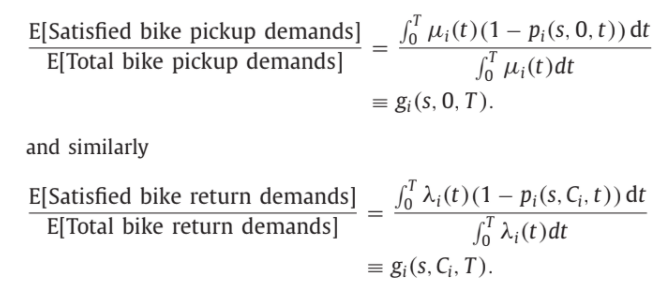

In [22]:
def e_satisfied(data,t,s,returnpickup) :
  c = int(data['upperbound'][(data['시간']==1)])
  if returnpickup == "pickup" :
    prob = mui(data,t)*(1-ps_cond(data,t,s,0))
  elif returnpickup == "return" : 
    prob = lambdai(data,t)*(1-ps_cond(data,t,s,c))
  return(prob)


## Calculate expected values using Integral or sigma
- Although the equation is expressed as continuous variable, as Time is descrete with the range of (0,1,2,...,23) we'll calculate it with sigma, not integral

In [23]:
def lemma1(data,t,s,returnpickup) :
  bunja = 0
  bunmo = 0
  for time in range(t+1) : 
    bunja += e_satisfied(data,time,s,returnpickup)
    if returnpickup =='pickup' : 
      bunmo += mui(data,time)
    elif returnpickup =='return':
      bunmo += lambdai(data,time)
  
  if bunmo == 0 :
    return(0)
  else : 
    return(bunja/bunmo)

## Calculate the min/max value of station inventory
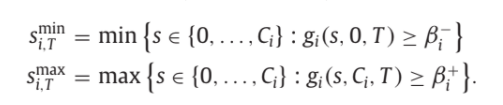

- To calculate this we'll need to see which \s in range($[0,C_{i}]$) is greater than the beta prob. 
- For the faster calculation, the original dataframe will be cropped according to the parameter i, month, day

In [24]:
def sminmax(i,month,t,beta) : 
  L1=[]
  L2=[]
  data = df[(df['대여소번호']==i)&(df['월']==month)].reset_index()
  c = int(data['upperbound'][(data['시간']==1)])
  for a in range(c+1) : 
    if lemma1(data,t,a,"pickup") >= beta :
      L1.append(a)
    if lemma1(data,t,a,"return") >= beta : 
      L2.append(a)
  
  if len(L1) == 0 : 
    a = '값없음'
  elif len(L1) > 0 :
    a = min(L1)
  if len(L2) == 0 : 
    b = '값없음'
  elif len(L2) > 0 :
    b = max(L2)
  return(a,b)

# 강북구

## 이디야 커피 수유역점 앞

In [32]:
df[df['대여소명'] == '이디야 커피 수유역점 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
11844,이디야 커피 수유역점 앞,1503,5,17,6.903226,1.725806,6.16129,1.540323,10.0


- 이디야 커피 수유역점 앞 대여소 번호 = 1503(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

In [58]:
%%time

answer1 = []
for j in range(0, 24):
    answer1.append(sminmax(1503,5,j,0.85))
answer1

Wall time: 21min 7s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 6),
 ('값없음', 7),
 ('값없음', 8),
 (8, 8),
 (3, 8),
 (2, 8),
 (2, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8)]

In [59]:
answer_df = pd.DataFrame(answer1).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,6
9,9시,값없음,7


In [60]:
answer_df.to_excel('./이디야 커피 수유역점 앞.xlsx', index = False)

# 강남구

## 현대고등학교 건너편

In [33]:
df[df['대여소명'] == '현대고등학교 건너편'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
1821,현대고등학교 건너편,2301,5,18,15.225806,3.806452,13.967742,3.491935,17.0


In [107]:
%%time

# 현대고등학교 건너편 대여소 번호 = 2301(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer2 = []
for j in range(0, 24):
    answer2.append(sminmax(2301,5,j,0.85))
answer2

Wall time: 56min 56s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (2, '값없음'),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16)]

In [108]:
answer_df = pd.DataFrame(answer2).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')
    
answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [109]:
answer_df.to_excel('./현대고등학교 건너편.xlsx', index = False)

# 강동구

## 천호역4번출구(현대백화점)

In [34]:
df[df['대여소명'] == '천호역4번출구(현대백화점)'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
1220,천호역4번출구(현대백화점),1009,5,18,17.516129,4.379032,19.935484,4.983871,16.0


In [25]:
# 천호역4번출구(현대백화점) 대여소 번호 = 1009(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer3 = []
for j in range(0, 24):
    answer3.append(sminmax(1009,5,j,0.85))
answer3

[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (14, 13),
 (3, 14),
 (1, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 14),
 (0, 15),
 (0, 15),
 (0, 15)]

In [26]:
answer_df = pd.DataFrame(answer3).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')
    
answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,14,13
9,9시,3,14


In [27]:
answer_df.to_excel('./천호역4번출구(현대백화점).xlsx', index = False)

# 강서구

## 마곡나루역 2번 출구

In [35]:
df[df['대여소명'] == '마곡나루역 2번 출구'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
128,마곡나루역 2번 출구,2715,5,18,32.516129,8.129032,37.774194,9.443548,32.0


In [28]:
%%time

# 마곡나루역 2번 출구 대여소 번호 = 2715(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer4 = []
for j in range(0, 24):
    answer4.append(sminmax(2715,5,j,0.85))
answer4

Wall time: 3h 7min 26s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 19),
 ('값없음', 30),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31),
 (0, 31)]

In [29]:
answer_df = pd.DataFrame(answer4).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,19
7,7시,값없음,30
8,8시,0,31
9,9시,0,31


In [30]:
answer_df.to_excel('./마곡나루역 2번 출구.xlsx', index = False)

# 관악구

## 봉림교 교통섬

In [36]:
df[df['대여소명'] == '봉림교 교통섬'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
78,봉림교 교통섬,2102,5,18,42.419355,10.604839,30.677419,7.669355,45.0


In [48]:
%%time

# 봉림교 교통섬 대여소 번호 = 2102(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer5 = []
for j in range(0, 24):
    answer5.append(sminmax(2102,5,j,0.85))
answer5

Wall time: 6h 12min 16s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (4, '값없음'),
 (2, 43),
 (1, 44),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45),
 (0, 45)]

In [49]:
answer_df = pd.DataFrame(answer5).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [50]:
answer_df.to_excel('./봉림교 교통섬.xlsx', index = False)

# 광진구

## 뚝섬유원지역 1번출구 앞

In [37]:
df[df['대여소명'] == '뚝섬유원지역 1번출구 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,5,18,63.096774,15.774194,53.580645,13.395161,89.0


In [31]:
%%time

# 뚝섬유원지역 1번출구 앞 대여소 번호 = 502(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer6 = []
for j in range(0, 24):
    answer6.append(sminmax(502,5,j,0.85))
answer6

Wall time: 23h 18min 51s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 77),
 ('값없음', 86),
 (2, 87),
 (0, 88),
 (0, 88),
 (0, 88),
 (0, 88),
 (0, 88),
 (0, 88),
 (0, 88),
 (0, 89),
 (0, 89),
 (0, 89)]

In [32]:
answer_df = pd.DataFrame(answer6).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [33]:
answer_df.to_excel('./뚝섬유원지역 1번출구 앞.xlsx', index = False)

# 구로구

## 신도림역 1번 출구 앞

In [66]:
df[df['대여소명'] == '신도림역 1번 출구 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
227,신도림역 1번 출구 앞,1906,5,18,27.096774,6.774194,29.032258,7.258065,24.0


In [34]:
%%time

# 신도림역 1번 출구 앞 대여소 번호 = 1906(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer7 = []
for j in range(0, 24):
    answer7.append(sminmax(1906,5,j,0.85))
answer7

Wall time: 1h 47min 51s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 22),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23),
 (0, 23)]

In [35]:
answer_df = pd.DataFrame(answer7).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,22
8,8시,0,23
9,9시,0,23


In [36]:
answer_df.to_excel('./신도림역 1번 출구 앞.xlsx', index = False)

# 금천구

## 독산보도육교 앞 자전거 보관소

In [67]:
df[df['대여소명'] == '독산보도육교 앞 자전거 보관소'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
2264,독산보도육교 앞 자전거 보관소,1827,5,18,13.935484,3.483871,11.354839,2.83871,17.0


In [37]:
%%time

# 독산보도육교 앞 자전거 보관소 대여소 번호 = 1827(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer8 = []
for j in range(0, 24):
    answer8.append(sminmax(1827,5,j,0.85))
answer8

Wall time: 55min 39s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (2, '값없음'),
 (1, '값없음'),
 (1, 11),
 (1, 14),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (1, 15)]

In [38]:
answer_df = pd.DataFrame(answer8).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,2,값없음
8,8시,1,값없음
9,9시,1,11


In [39]:
answer_df.to_excel('./독산보도육교 앞 자전거 보관소.xlsx', index = False)

# 노원구

## 공릉역 1번 출구 앞

In [68]:
df[df['대여소명'] == '공릉역 1번 출구 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
1498,공릉역 1번 출구 앞,1608,5,18,16.064516,4.016129,13.967742,3.491935,14.0


In [40]:
%%time

# 공릉역 1번 출구 앞 대여소 번호 = 1608(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer9 = []
for j in range(0, 24):
    answer9.append(sminmax(1608,5,j,0.85))
answer9

Wall time: 38min 49s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 8),
 (3, 10),
 (2, 11),
 (1, 11),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12)]

In [41]:
answer_df = pd.DataFrame(answer9).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,8
9,9시,3,10


In [42]:
answer_df.to_excel('./공릉역 1번 출구 앞.xlsx', index = False)

# 도봉구

## 창동역 2번출구

In [69]:
df[df['대여소명'] == '창동역 2번출구'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
5363,창동역 2번출구,1721,5,18,10.032258,2.508065,12.225806,3.056452,14.0


In [43]:
%%time

# 창동역 2번출구 대여소 번호 = 1721(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer10 = []
for j in range(0, 24):
    answer10.append(sminmax(1721,5,j,0.85))
answer10

Wall time: 38min 51s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 11),
 (8, 12),
 (2, 12),
 (1, 12),
 (1, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12)]

In [44]:
answer_df = pd.DataFrame(answer10).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,11
8,8시,8,12
9,9시,2,12


In [45]:
answer_df.to_excel('./창동역 2번출구.xlsx', index = False)

# 동대문구

## 장한평역 1번출구 (국민은행앞)

In [70]:
df[df['대여소명'] == '장한평역 1번출구 (국민은행앞)'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
524,장한평역 1번출구 (국민은행앞),646,5,8,23.322581,5.830645,13.967742,3.491935,14.0


In [25]:
%%time

# 장한평역 1번출구 (국민은행앞) 대여소 번호 = 646(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer11 = []
for j in range(0, 24):
    answer11.append(sminmax(646,5,j,0.85))
answer11

Wall time: 39min 23s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (5, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12),
 (0, 12)]

In [26]:
answer_df = pd.DataFrame(answer11).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,5,12
8,8시,0,12
9,9시,0,12


In [27]:
answer_df.to_excel('./장한평역 1번출구 (국민은행앞).xlsx', index = False)

# 동작구

## 흑석역 1번출구

In [71]:
df[df['대여소명'] == '흑석역 1번출구'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
1244,흑석역 1번출구,2025,5,18,17.419355,4.354839,13.096774,3.274194,22.0


In [28]:
%%time

# 흑석역 1번출구 대여소 번호 = 2025(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer12 = []
for j in range(0, 24):
    answer12.append(sminmax(2025,5,j,0.85))
answer12

Wall time: 1h 34min 42s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (11, '값없음'),
 (2, '값없음'),
 (1, '값없음'),
 (1, 16),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20),
 (0, 20)]

In [29]:
answer_df = pd.DataFrame(answer12).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,11,값없음
9,9시,2,값없음


In [30]:
answer_df.to_excel('./흑석역 1번출구.xlsx', index = False)

# 마포구

## 마포구민체육센터 앞

In [72]:
df[df['대여소명'] == '마포구민체육센터 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
52,마포구민체육센터 앞,152,5,19,42.935484,10.733871,31.096774,7.774194,65.0


In [28]:
%%time

# 마포구민체육센터 앞 대여소 번호 = 152(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer13 = []
for j in range(0, 24):
    answer13.append(sminmax(152,5,j,0.85))
answer13

Wall time: 12h 43min 37s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 59),
 (2, 64),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65),
 (0, 65)]

In [29]:
answer_df = pd.DataFrame(answer13).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [30]:
answer_df.to_excel('./마포구민체육센터 앞.xlsx', index = False)

# 서대문구

## 홍은사거리

In [73]:
df[df['대여소명'] == '홍은사거리'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
4089,홍은사거리,117,5,19,11.354839,2.83871,10.129032,2.532258,14.0


In [31]:
%%time

# 홍은사거리 대여소 번호 = 117(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer14 = []
for j in range(0, 24):
    answer14.append(sminmax(117,5,j,0.85))
answer14

Wall time: 39min 55s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (4, '값없음'),
 (2, 9),
 (2, 13),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14)]

In [32]:
answer_df = pd.DataFrame(answer14).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,4,값없음
9,9시,2,9


In [33]:
answer_df.to_excel('./홍은사거리.xlsx', index = False)

# 서초구

## 고속터미널역 8-1번, 8-2번 출구 사이

In [74]:
df[df['대여소명'] == '고속터미널역 8-1번, 8-2번 출구 사이'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
747,"고속터미널역 8-1번, 8-2번 출구 사이",2219,5,18,21.967742,5.491935,22.290323,5.572581,27.0


In [34]:
%%time

# 고속터미널역 8-1번, 8-2번 출구 사이 대여소 번호 = 2219(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer15 = []
for j in range(0, 24):
    answer15.append(sminmax(2219,5,j,0.85))
answer15

Wall time: 2h 19min 16s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 24),
 (14, 25),
 (1, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26),
 (0, 26)]

In [35]:
answer_df = pd.DataFrame(answer15).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [36]:
answer_df.to_excel('./고속터미널역 8-1번, 8-2번 출구 사이.xlsx', index = False)

# 성동구

## 옥수역 3번출구

In [75]:
df[df['대여소명'] == '옥수역 3번출구'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
276,옥수역 3번출구,565,5,18,25.774194,6.443548,25.516129,6.379032,34.0


In [47]:
%%time

# 옥수역 3번출구 대여소 번호 = 565(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer16 = []
for j in range(0, 24):
    answer16.append(sminmax(565,5,j,0.85))
answer16

Wall time: 3h 33min 24s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (1, 28),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33),
 (0, 33)]

In [48]:
answer_df = pd.DataFrame(answer16).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,1,28


In [49]:
answer_df.to_excel('./옥수역 3번출구.xlsx', index = False)

# 성북구

## 안암로터리 버스정류장 앞

In [76]:
df[df['대여소명'] == '안암로터리 버스정류장 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
2315,안암로터리 버스정류장 앞,1308,5,18,13.903226,3.475806,17.548387,4.387097,19.0


In [37]:
%%time

# 안암로터리 버스정류장 앞 대여소 번호 = 1308(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer17 = []
for j in range(0, 24):
    answer17.append(sminmax(1308,5,j,0.85))
answer17

Wall time: 1h 9min 19s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 15),
 ('값없음', 17),
 (3, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17),
 (0, 17)]

In [38]:
answer_df = pd.DataFrame(answer17).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,15


In [39]:
answer_df.to_excel('./안암로터리 버스정류장 앞.xlsx', index = False)

# 송파구

## 롯데월드타워(잠실역2번출구 쪽)

In [77]:
df[df['대여소명'] == '롯데월드타워(잠실역2번출구 쪽)'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
179,롯데월드타워(잠실역2번출구 쪽),1210,5,18,29.580645,7.395161,45.354839,11.33871,39.0


In [25]:
%%time

# 롯데월드타워(잠실역2번출구 쪽) 대여소 번호 = 1210(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer18 = []
for j in range(0, 24):
    answer18.append(sminmax(1210,5,j,0.85))
answer18

Wall time: 4h 37min 32s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 37),
 (2, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37),
 (0, 37)]

In [26]:
answer_df = pd.DataFrame(answer18).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,37
7,7시,2,37
8,8시,0,37
9,9시,0,37


In [27]:
answer_df.to_excel('./롯데월드타워(잠실역2번출구 쪽).xlsx', index = False)

# 양천구

## 목동역5번출구 교통정보센터 앞

In [78]:
df[df['대여소명'] == '목동역5번출구 교통정보센터 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
622,목동역5번출구 교통정보센터 앞,770,5,18,22.580645,5.645161,21.419355,5.354839,17.0


In [40]:
%%time

# 목동역5번출구 교통정보센터 앞 대여소 번호 = 770(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer19 = []
for j in range(0, 24):
    answer19.append(sminmax(770,5,j,0.85))
answer19

Wall time: 56min 8s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 14),
 (3, 15),
 (1, 15),
 (1, 15),
 (1, 15),
 (0, 15),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16),
 (0, 16)]

In [41]:
answer_df = pd.DataFrame(answer19).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,14
8,8시,3,15
9,9시,1,15


In [42]:
answer_df.to_excel('./목동역5번출구 교통정보센터 앞.xlsx', index = False)

# 영등포구

## 여의나루역 1번출구 앞

In [79]:
df[df['대여소명'] == '여의나루역 1번출구 앞'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
26,여의나루역 1번출구 앞,207,5,18,56.870968,14.217742,54.516129,13.629032,84.0


In [25]:
%%time

# 여의나루역 1번출구 앞 대여소 번호 = 207(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer20 = []
for j in range(0, 24):
    answer20.append(sminmax(207,5,j,0.85))
answer20

Wall time: 21h 34min 40s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (2, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84),
 (0, 84)]

In [26]:
answer_df = pd.DataFrame(answer20).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,값없음,값없음


In [27]:
answer_df.to_excel('./여의나루역 1번출구 앞.xlsx', index = False)

# 용산구

## 용산역 맞은편

In [80]:
df[df['대여소명'] == '용산역 맞은편'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
996,용산역 맞은편,853,5,18,19.806452,4.951613,19.516129,4.879032,20.0


In [25]:
%%time

# 용산역 맞은편 대여소 번호 = 853(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer21 = []
for j in range(0, 24):
    answer21.append(sminmax(853,5,j,0.85))
answer21

Wall time: 1h 15min 5s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 19),
 ('값없음', 20),
 (10, 20),
 (2, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20),
 (1, 20)]

In [26]:
answer_df = pd.DataFrame(answer21).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,19
9,9시,값없음,20


In [27]:
answer_df.to_excel('./용산역 맞은편.xlsx', index = False)

# 은평구

## CJ 드림시티

In [81]:
df[df['대여소명'] == 'CJ 드림시티'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
1094,CJ 드림시티,907,5,18,18.83871,4.709677,13.709677,3.427419,22.0


In [28]:
%%time

# CJ 드림시티 대여소 번호 = 907(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer22 = []
for j in range(0, 24):
    answer22.append(sminmax(907,5,j,0.85))
answer22

Wall time: 1h 34min 51s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (7, '값없음'),
 (1, '값없음'),
 (0, 17),
 (0, 20),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 21),
 (0, 22)]

In [29]:
answer_df = pd.DataFrame(answer22).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,값없음
9,9시,7,값없음


In [30]:
answer_df.to_excel('./CJ 드림시티.xlsx', index = False)

# 종로구

## 동묘앞역 1번출구 뒤

In [82]:
df[df['대여소명'] == '동묘앞역 1번출구 뒤'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
8358,동묘앞역 1번출구 뒤,361,5,18,8.354839,2.08871,7.451613,1.862903,11.0


In [38]:
%%time

# 동묘앞역 1번출구 뒤 대여소 번호 = 361(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer23 = []
for j in range(0, 24):
    answer23.append(sminmax(361,5,j,0.85))
answer23

Wall time: 25min 14s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', 6),
 (4, 10),
 (3, 10),
 (2, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (1, 11),
 (0, 11),
 (0, 11),
 (0, 11),
 (0, 11)]

In [39]:
answer_df = pd.DataFrame(answer23).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,값없음,6
9,9시,4,10


In [40]:
answer_df.to_excel('./동묘앞역 1번출구 뒤.xlsx', index = False)

# 중구

## 청계천 영도교

In [83]:
df[df['대여소명'] == '청계천 영도교'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
10180,청계천 영도교,431,5,18,7.580645,1.895161,7.258065,1.814516,8.0


In [41]:
%%time

# 청계천 영도교 대여소 번호 = 431(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer24 = []
for j in range(0, 24):
    answer24.append(sminmax(431,5,j,0.85))
answer24

Wall time: 14min 14s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (3, 1),
 (2, 5),
 (2, 6),
 (2, 6),
 (2, 7),
 (2, 7),
 (2, 7),
 (1, 7),
 (1, 7),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8),
 (1, 8)]

In [42]:
answer_df = pd.DataFrame(answer24).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,3,1
8,8시,2,5
9,9시,2,6


In [43]:
answer_df.to_excel('./청계천 영도교.xlsx', index = False)

# 중랑구

## 중랑세무서

In [84]:
df[df['대여소명'] == '중랑세무서'].head(1)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
2961,중랑세무서,1451,5,19,12.870968,3.217742,9.548387,2.387097,14.0


In [44]:
%%time

# 중랑세무서 대여소 번호 = 1451(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer25 = []
for j in range(0, 24):
    answer25.append(sminmax(1451,5,j,0.85))
answer25

Wall time: 39min 20s


[('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 ('값없음', '값없음'),
 (9, '값없음'),
 (4, '값없음'),
 (3, '값없음'),
 (2, 7),
 (2, 12),
 (2, 14),
 (2, 14),
 (2, 14),
 (2, 14),
 (2, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14),
 (1, 14)]

In [45]:
answer_df = pd.DataFrame(answer25).rename(columns = {0 : 's_min', 1 : 's_max'})

t = []
for i in range(len(answer_df)):
    t.append(str(answer_df.index[i] % 24) + '시')

answer_df['time'] = t
answer_df = answer_df[['time', 's_min', 's_max']]
answer_df

,time,s_min,s_max
0,0시,값없음,값없음
1,1시,값없음,값없음
2,2시,값없음,값없음
3,3시,값없음,값없음
4,4시,값없음,값없음
5,5시,값없음,값없음
6,6시,값없음,값없음
7,7시,값없음,값없음
8,8시,9,값없음
9,9시,4,값없음


In [46]:
answer_df.to_excel('./중랑세무서.xlsx', index = False)